In [190]:
import pandas as pd

# Load the uploaded dataset

df = pd.read_csv('Absenteeism_at_work.csv', delimiter=';')

In [191]:
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [192]:
df['Day of the week'].value_counts


<bound method IndexOpsMixin.value_counts of 0      3
1      3
2      4
3      5
4      5
      ..
735    3
736    3
737    3
738    4
739    6
Name: Day of the week, Length: 740, dtype: int64>

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

### Dataset Structure

- **ID**: Unique identifier for each employee.
- **Reason for absence**: Encoded reasons for absenteeism.
- **Month of absence**: Encoded representation of the month (1–12).
- **Day of the week**: Encoded days (Monday (2), Tuesday (3), Wednesday (4), Thursday (5), Friday (6)).
- **Seasons**: Encoded seasons (1 = Summer, etc.).
- **Transportation expense**: Cost of transportation for the employee.
- **Distance from Residence to Work**: Distance in kilometers.
- **Service time**: Years of service.
- **Age**: Employee age.
- **Work load Average/day**: Daily average workload.
- **Hit target**: Achievement metric.
- **Disciplinary failure**: Whether disciplinary issues occurred (0/1). (yes=1; no=0)
- **Education**: Education level (encoded). (Education (high school (1), graduate (2), postgraduate (3), master and doctor (4)))
- **Social drinker/smoker**: Binary indicators for social drinking or smoking. (yes=1; no=0)
- **Pet**: Number of pets
- **Height/Weight**: Height or weight of the employee
- **Body mass index (BMI)**: Calculated BMI based on weight and height.
- **Absenteeism time in hours**: Hours of absenteeism.


In [194]:
df['Reason for absence'].unique()

array([26,  0, 23,  7, 22, 19,  1, 11, 14, 21, 10, 13, 28, 18, 25, 24,  6,
       27, 17,  8, 12,  5,  9, 15,  4,  3,  2, 16])

## Creating a mapping for categorical variables, which would help us in building the dashboard later. This steps assigns a value instead of a number


In [195]:
# create a mapping to assign a reason for absence from work
reason_mapping = {
    0: "Certain infectious and parasitic diseases",
    1: "Neoplasms",
    2: "Diseases of the blood and blood-forming organs",
    3: "Endocrine, nutritional and metabolic diseases",
    4: "Mental and behavioural disorders",
    5: "Diseases of the nervous system",
    6: "Diseases of the eye and adnexa",
    7: "Diseases of the ear and mastoid process",
    8: "Diseases of the circulatory system",
    9: "Diseases of the respiratory system",
    10: "Diseases of the digestive system",
    11: "Diseases of the skin and subcutaneous tissue",
    12: "Diseases of the musculoskeletal system and connective tissue",
    13: "Diseases of the genitourinary system",
    14: "Pregnancy, childbirth and the puerperium",
    15: "Certain conditions originating in the perinatal period",
    16: "Congenital malformations, deformations, and chromosomal abnormalities",
    17: "Symptoms, signs and abnormal clinical and laboratory findings",
    18: "Injury, poisoning, and certain other consequences of external causes",
    19: "External causes of morbidity and mortality",
    20: "Factors influencing health status and contact with health services",
    21: "Patient follow-up",
    22: "Medical consultation",
    23: "Blood donation",
    24: "Laboratory examination",
    25: "Unjustified absence",
    26: "Physiotherapy",
    27: "Dental consultation",
}
df['Reason for absence'] = df['Reason for absence'].map(reason_mapping)


In [196]:
season_mapping = {
    1: 'Summer',
    2: 'Spring',
    3: 'Fall',
    4: 'Winter'
}

df['Seasons'] = df['Seasons'].map(season_mapping)

In [197]:
month_mapping = {
    1: "January",
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December"
}

df['Month of absence'] = df['Month of absence'].map(month_mapping)

In [198]:
day_mapping = {
    2 : "Monday",
    3: "Tuesday",
    4: "Wednesday",
    5: "Thursday",
    6: "Friday"
}

df['Day of the week'] = df['Day of the week'].map(day_mapping)

In [199]:
df['Day of the week'].value_counts

<bound method IndexOpsMixin.value_counts of 0        Tuesday
1        Tuesday
2      Wednesday
3       Thursday
4       Thursday
         ...    
735      Tuesday
736      Tuesday
737      Tuesday
738    Wednesday
739       Friday
Name: Day of the week, Length: 740, dtype: object>

In [200]:
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,Physiotherapy,July,Tuesday,Summer,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,Certain infectious and parasitic diseases,July,Tuesday,Summer,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,Blood donation,July,Wednesday,Summer,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,Diseases of the ear and mastoid process,July,Thursday,Summer,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,Blood donation,July,Thursday,Summer,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


Blood donation                                                           149
Dental consultation                                                       69
Diseases of the genitourinary system                                      55
Certain infectious and parasitic diseases                                 43
External causes of morbidity and mortality                                40
Medical consultation                                                      38
Physiotherapy                                                             33
Unjustified absence                                                       31
Diseases of the skin and subcutaneous tissue                              26
Diseases of the digestive system                                          25
Injury, poisoning, and certain other consequences of external causes      21
Pregnancy, childbirth and the puerperium                                  19
Neoplasms                                                                 16

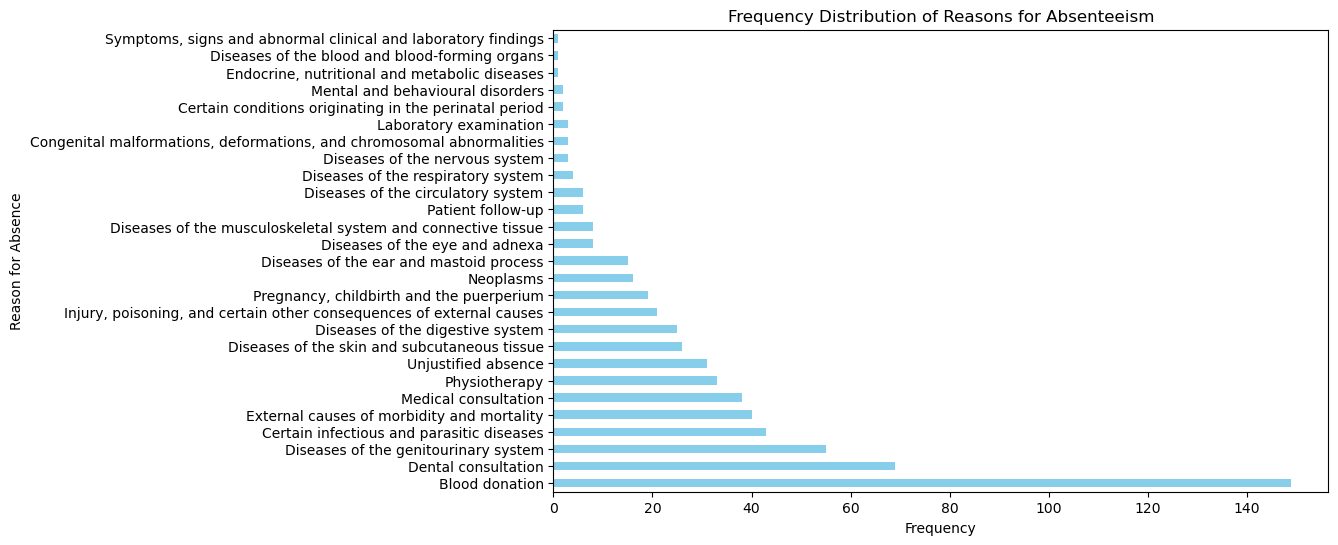

In [201]:
import matplotlib.pyplot as plt

# Calculate frequency distribution of absenteeism reasons
reason_counts = df['Reason for absence'].value_counts()

# Display frequency distribution
print(reason_counts)

# Plot the frequency distribution
plt.figure(figsize=(10, 6))
reason_counts.plot(kind='barh', color='skyblue')
plt.title('Frequency Distribution of Reasons for Absenteeism')
plt.xlabel('Frequency')
plt.ylabel('Reason for Absence')
plt.show()

Insight: The highest reason for absenteeism in employees is blood donation with over 140 counts out of the 700 instances in the dataset.

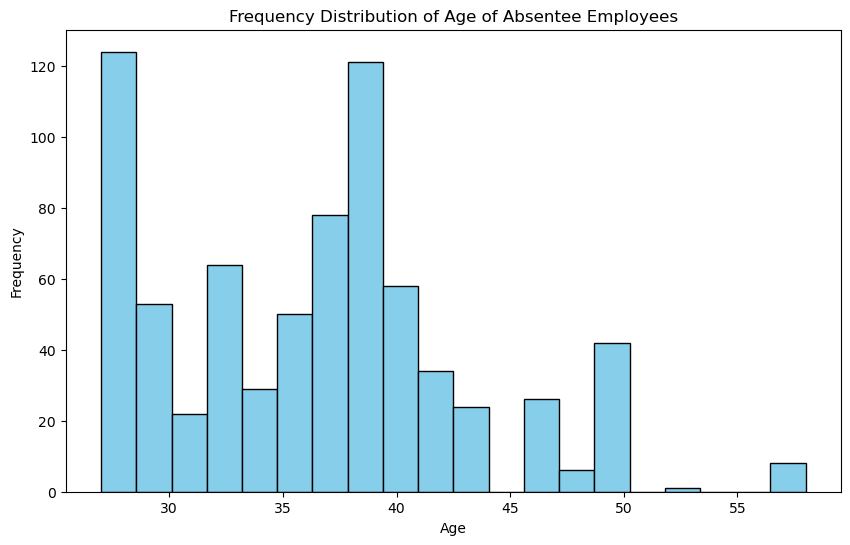

In [202]:
# Plot the frequency distribution for age of absentee employees
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Frequency Distribution of Age of Absentee Employees')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Insight: After the age of 40, employees start taking fewer leaves.

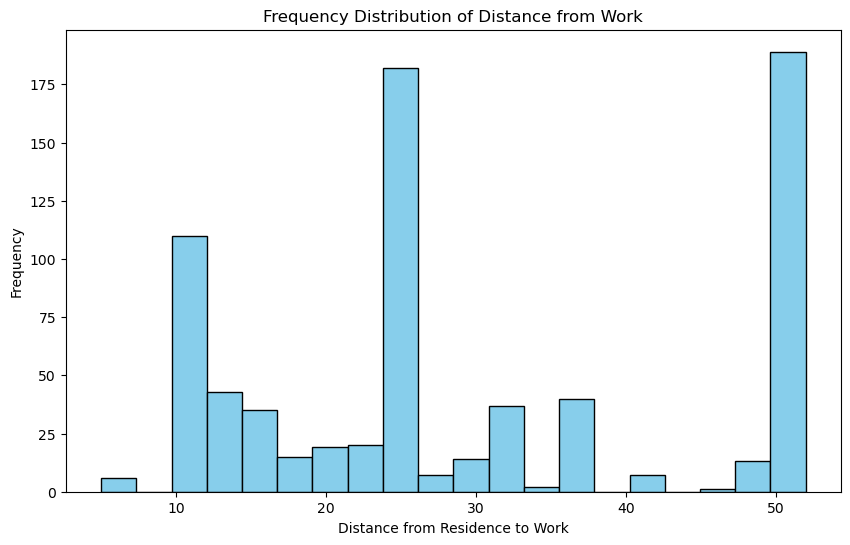

In [203]:
plt.figure(figsize=(10, 6))
plt.hist(df['Distance from Residence to Work'], bins=20, color='skyblue', edgecolor='black')
plt.title('Frequency Distribution of Distance from Work')
plt.xlabel('Distance from Residence to Work')
plt.ylabel('Frequency')
plt.show()

Insight: Unable to find a clear pattern between distance from work and absenteeism

/var/folders/fx/cj87kbwd5m3351r36_y81c440000gn/T/ipykernel_72025/1234995574.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


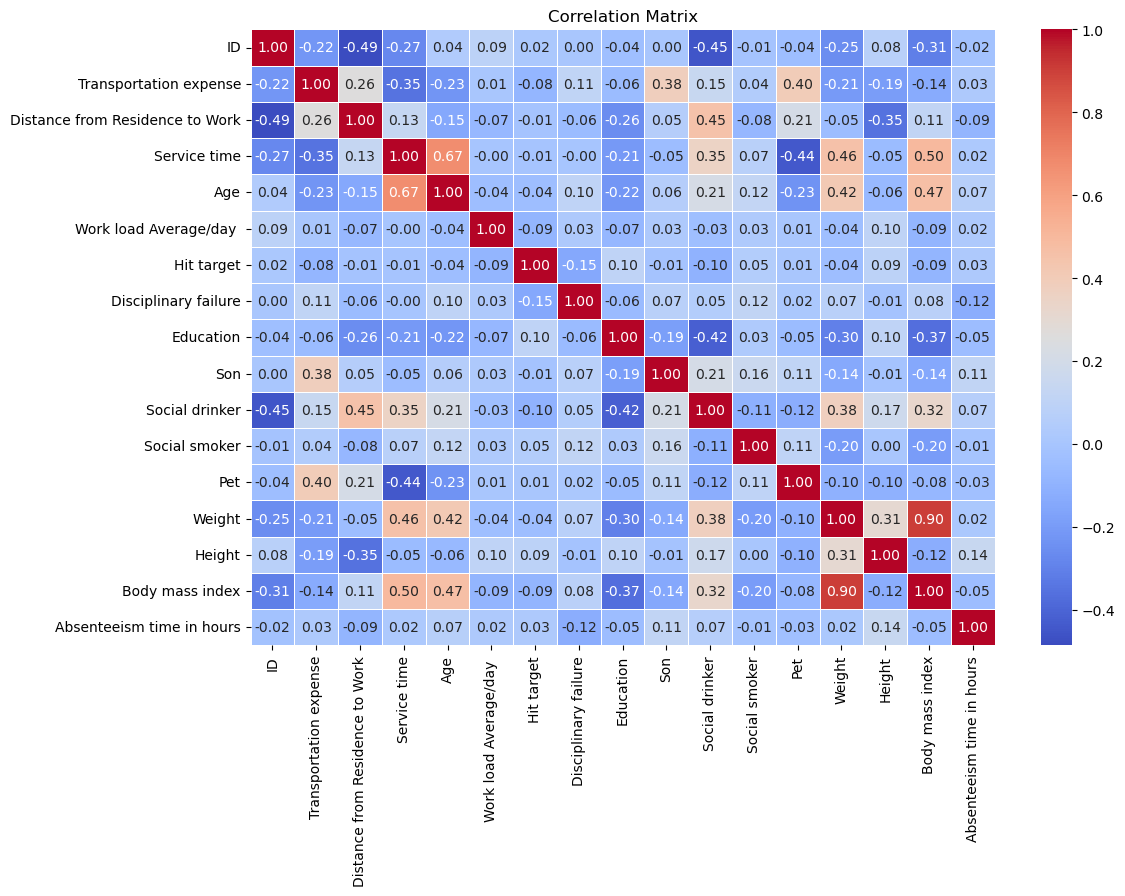

In [204]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Calculate the correlation matrix
corr_matrix = df.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [205]:
df['ID'].value_counts()

3     113
28     76
34     55
22     46
20     42
11     40
15     37
36     34
24     30
14     29
33     24
10     24
1      23
17     20
5      19
18     16
13     15
25     10
9       8
6       8
23      8
27      7
12      7
30      7
2       6
7       6
26      5
32      5
29      5
19      3
21      3
31      3
8       2
16      2
4       1
35      1
Name: ID, dtype: int64

In [206]:
max_leaver_taker = df[df['ID'] == 3]

max_leaver_taker


,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
2,3,Blood donation,July,Wednesday,Summer,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
5,3,Blood donation,July,Friday,Summer,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
13,3,Diseases of the skin and subcutaneous tissue,July,Wednesday,Summer,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,1
14,3,Blood donation,July,Wednesday,Summer,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,4
16,3,Blood donation,July,Friday,Summer,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,3,Dental consultation,March,Thursday,Spring,179,51,18,38,222.196,...,0,1,0,1,0,0,89,170,31,3
645,3,Dental consultation,March,Friday,Spring,179,51,18,38,222.196,...,0,1,0,1,0,0,89,170,31,3
646,3,Dental consultation,March,Tuesday,Fall,179,51,18,38,222.196,...,0,1,0,1,0,0,89,170,31,3
649,3,Dental consultation,March,Wednesday,Fall,179,51,18,38,222.196,...,0,1,0,1,0,0,89,170,31,3


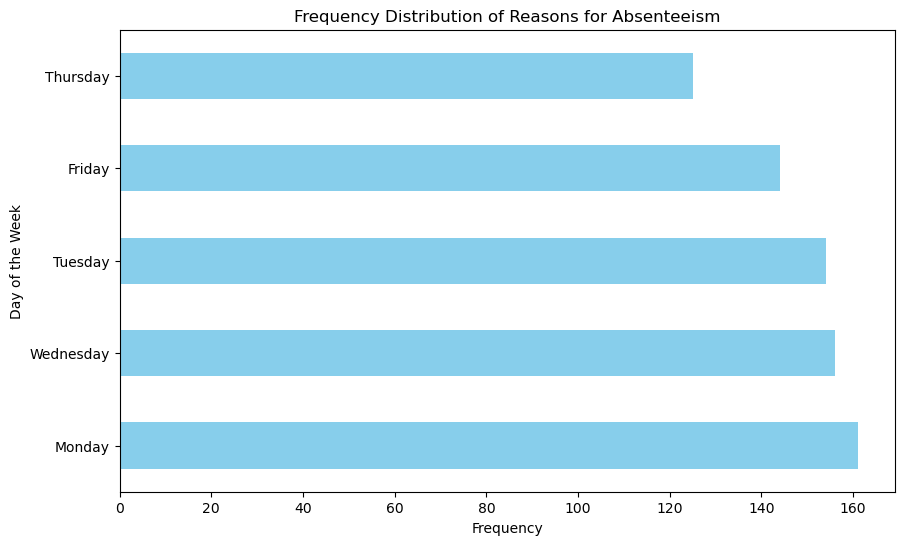

In [207]:
# Calculate frequency distribution of absenteeism by days
day_counts = df['Day of the week'].value_counts()


# Plot the frequency distribution
plt.figure(figsize=(10, 6))
day_counts.plot(kind='barh', color='skyblue')
plt.title('Frequency Distribution of Reasons for Absenteeism')
plt.xlabel('Frequency')
plt.ylabel('Day of the Week')
plt.show()

Insight: No day shows higher leaves in comparison to others.

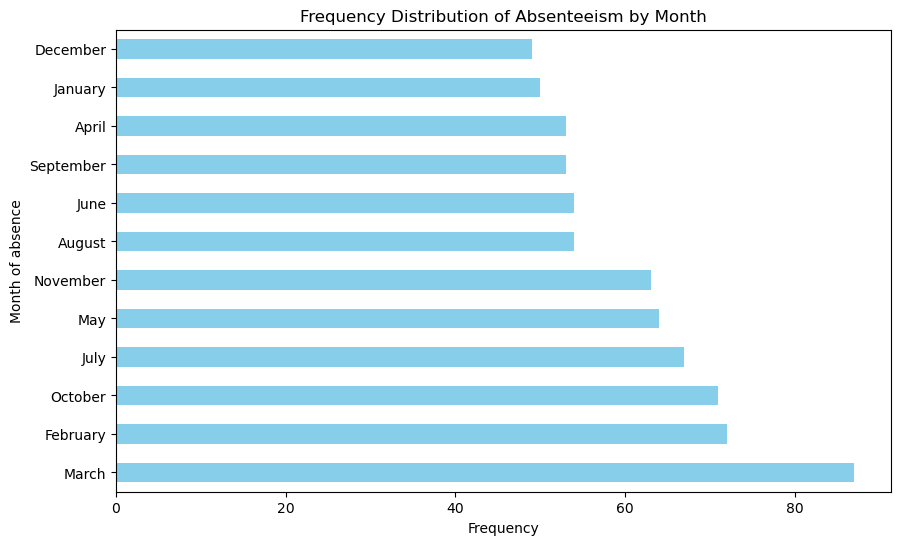

In [209]:
# Calculate frequency distribution of absenteeism by days
month_counts = df['Month of absence'].value_counts()


# Plot the frequency distribution
plt.figure(figsize=(10, 6))
month_counts.plot(kind='barh', color='skyblue')
plt.title('Frequency Distribution of Absenteeism by Month')
plt.xlabel('Frequency')
plt.ylabel('Month of absence')
plt.show()

Insight: March has the maximum number of leaves, while December has the lowest. This could be attributed to leaves lapsing in March, which makes employees use up their leave balance.

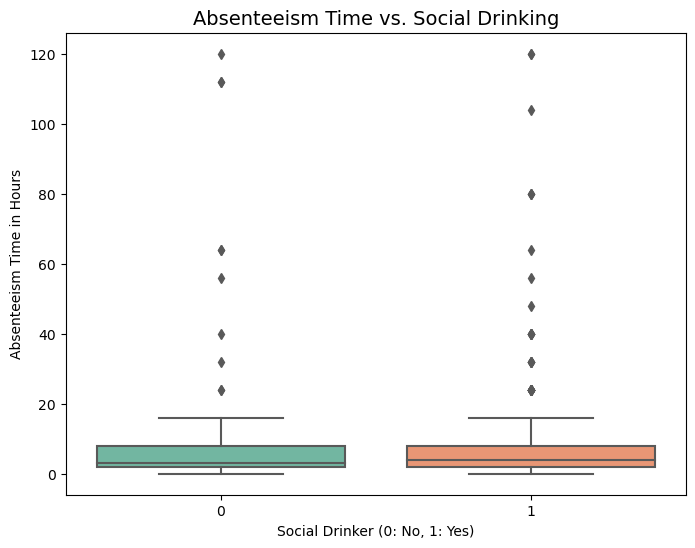

In [210]:
# Box plot to examine absenteeism based on social drinking habits
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Social drinker', y='Absenteeism time in hours', palette='Set2')
plt.title('Absenteeism Time vs. Social Drinking', fontsize=14)
plt.xlabel('Social Drinker (0: No, 1: Yes)')
plt.ylabel('Absenteeism Time in Hours')
plt.show()

Social drinkers tend to have higher variability in absenteeism compared to non-drinkers.


In [ ]:
# converting to csv to ensure the data is suitable for analysis in Power BI
df.to_csv('absenteeism_revised.csv')